In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardiovascular-disease-dataset


In [3]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd
import os
import kagglehub


# Assuming the file is named something like 'heart.csv' or similar
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]  # gets first .csv file

# Read the CSV file
df = pd.read_csv(os.path.join(path, csv_file), delimiter = ';')

# Display first few rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print(df.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
df['age']/365

,age
0,50.391781
1,55.419178
2,51.663014
3,48.282192
4,47.873973
...,...
69995,52.712329
69996,61.920548
69997,52.235616
69998,61.454795


In [ ]:
df_changed = df.copy()
df_changed['age'] =df['age']/365

In [ ]:
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [ ]:
df_changed.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_changed.skew()

,0
id,-0.001278
age,-0.307055
gender,0.630960
height,-0.642187
weight,1.012070
ap_hi,85.296214
ap_lo,32.114083
cholesterol,1.587123
gluc,2.397462
smoke,2.905867


In [ ]:
df_changed.kurt()

,0
id,-1.198374
age,-0.823447
gender,-1.601935
height,7.943653
weight,2.586825
ap_hi,7580.074738
ap_lo,1425.914585
cholesterol,0.993901
gluc,4.294377
smoke,6.444250


In [ ]:
print(df['ap_hi'], df['ap_lo'])

0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64 0         80
1         90
2         70
3        100
4         60
        ... 
69995     80
69996     90
69997     90
69998     80
69999     80
Name: ap_lo, Length: 70000, dtype: int64


In [ ]:
df.isna().sum().sum()

np.int64(0)

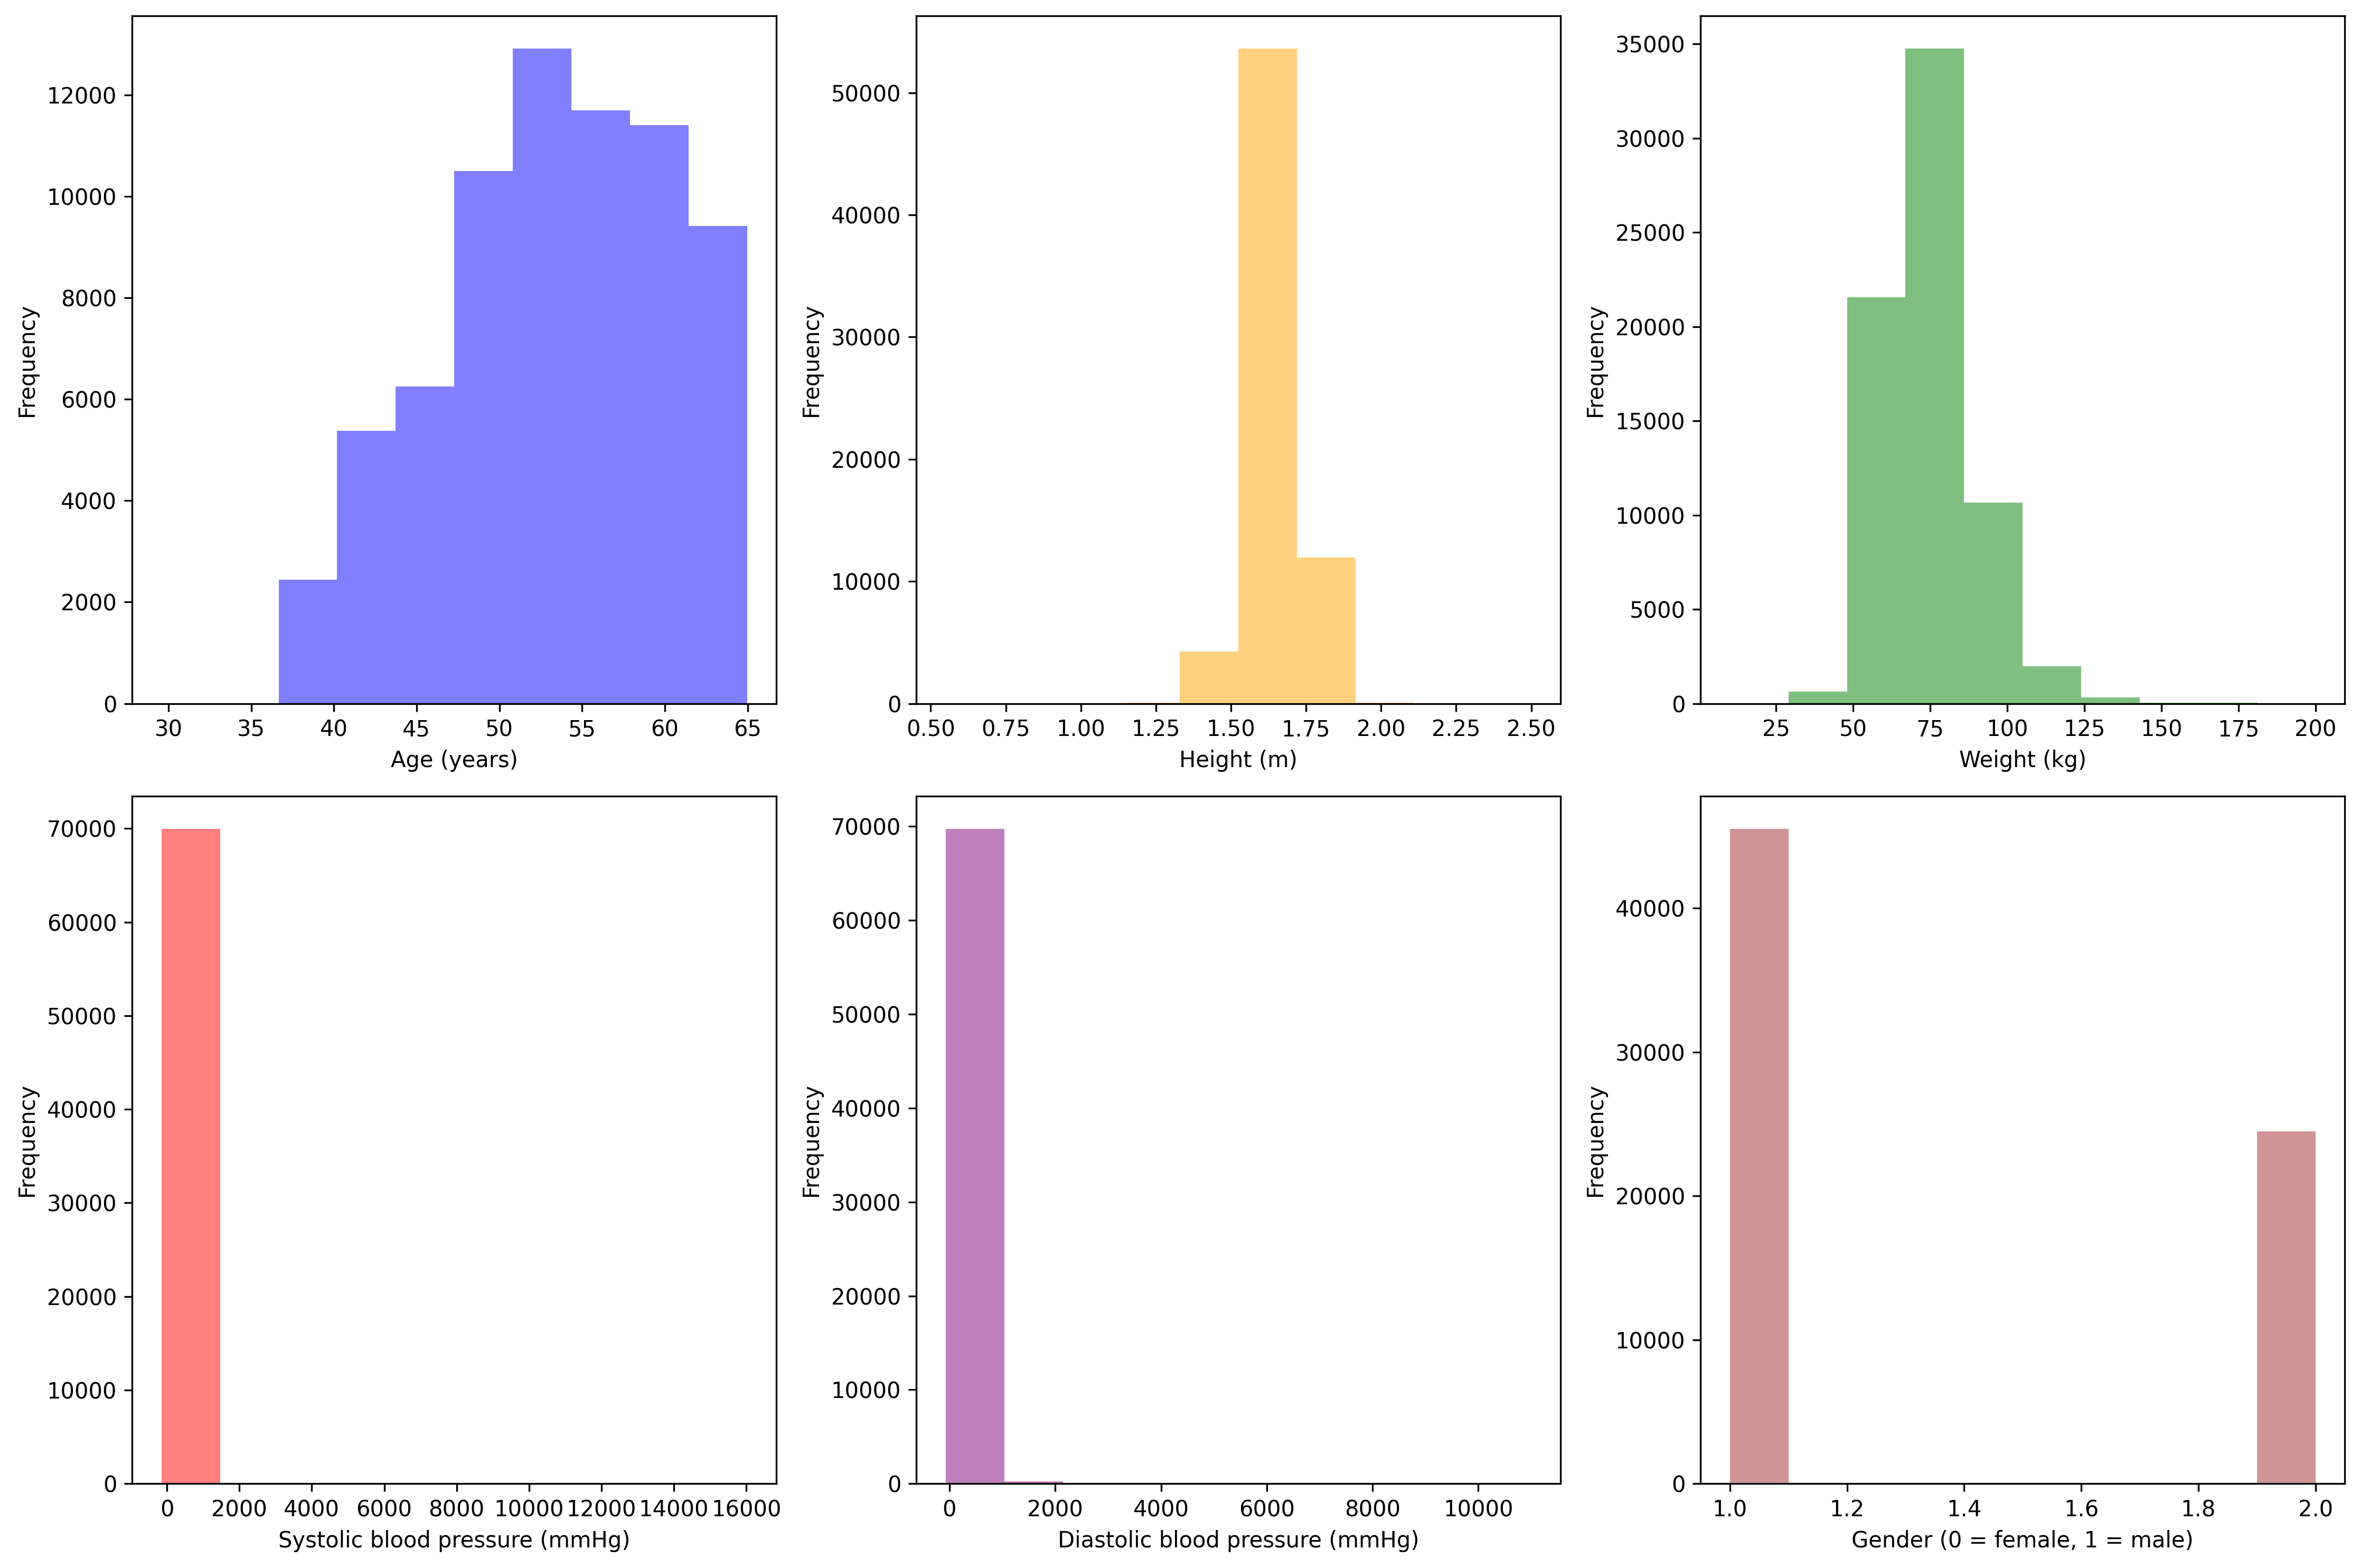

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10), dpi=300)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender']
labels = ['Age (years)', 'Height (m)', 'Weight (kg)', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Gender (0 = female, 1 = male)']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df[variables[i]]/365 if variables[i] == 'age' else (df[variables[i]]/100 if variables[i] == 'height' else df[variables[i]]), bins=10, alpha=0.5, color=colors[i])
    plt.xlabel(labels[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-1317064273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables[i], data=df, palette=[colors[i]])
/tmp/ipython-input-8-1317064273.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=variables[i], data=df, palette=[colors[i]])
/tmp/ipython-input-8-1317064273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variables[i], data=df, palette=[colors[i]])
/tmp/ipython-input-8-1317064273.py:11: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=variables[i], data=d

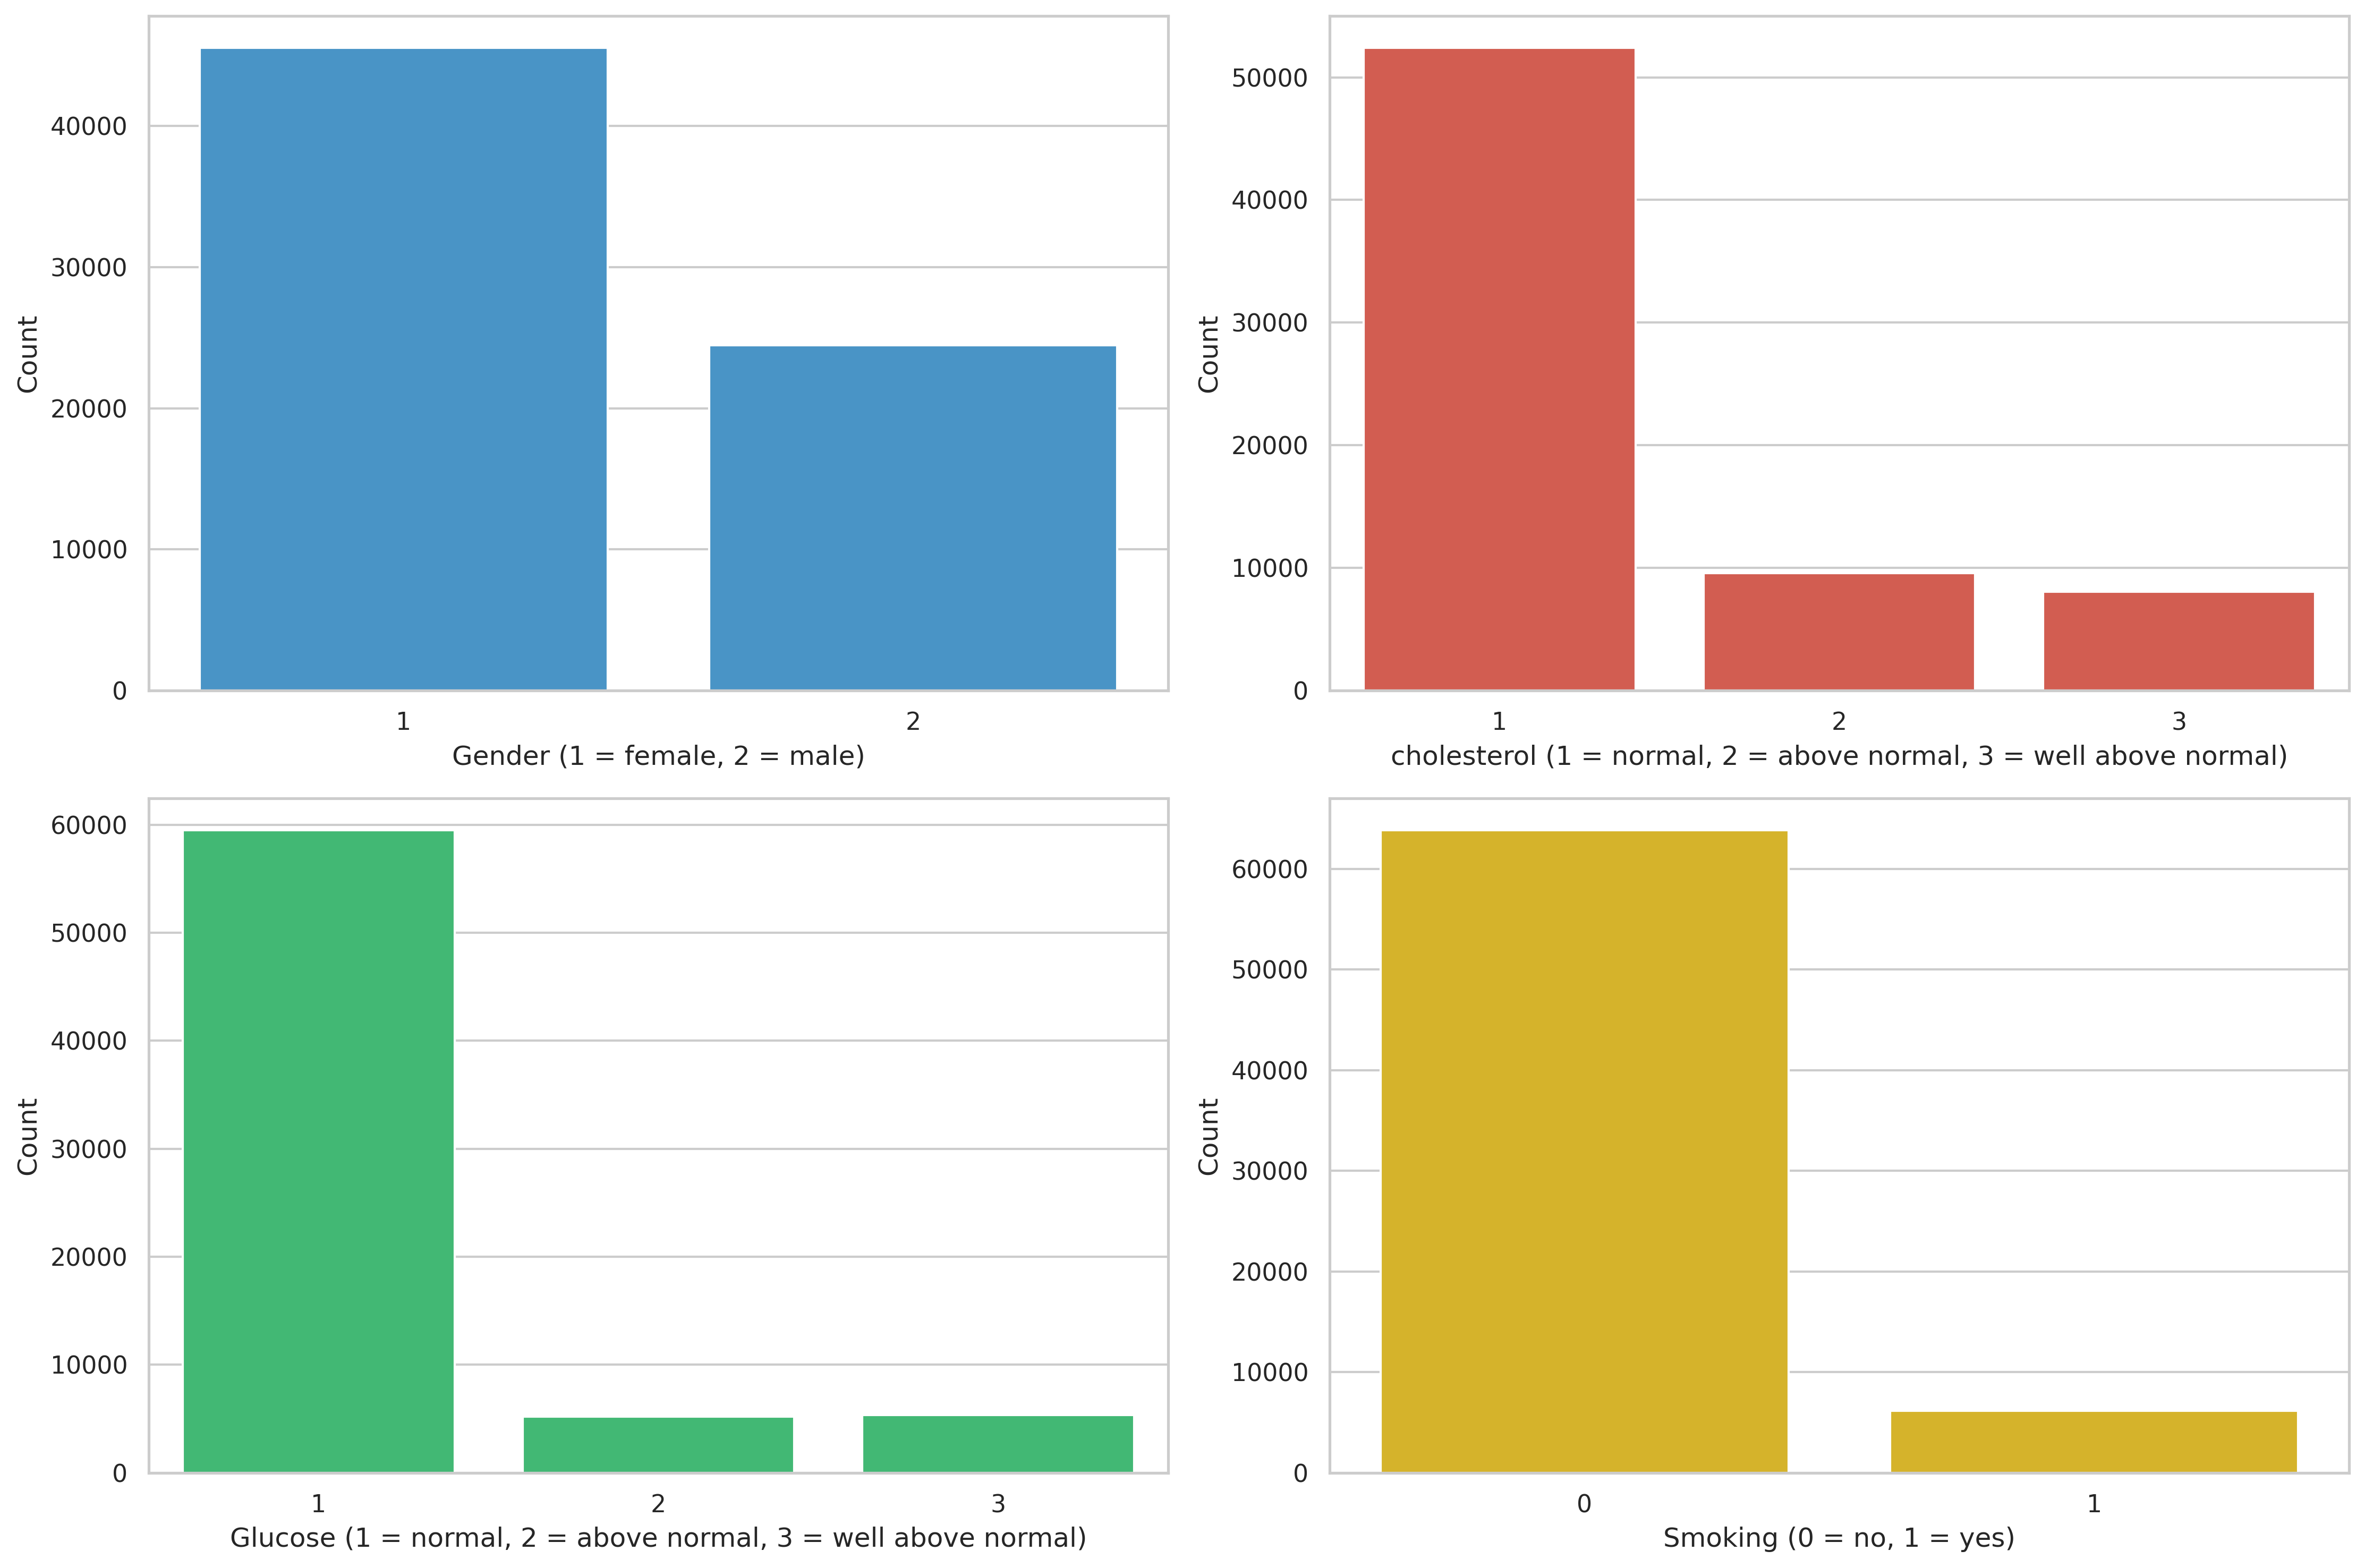

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10), dpi=300)
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"]
variables = ["gender", "cholesterol", "gluc", "smoke"]
labels = ["Gender (1 = female, 2 = male)", "cholesterol (1 = normal, 2 = above normal, 3 = well above normal)", "Glucose (1 = normal, 2 = above normal, 3 = well above normal)", "Smoking (0 = no, 1 = yes)"] # define a list of labels
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(x=variables[i], data=df, palette=[colors[i]])
    plt.xlabel(labels[i])
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df['gender'].value_counts()

,count
gender,
1,45530
2,24470


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


/tmp/ipython-input-15-35565144.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_patients['gender'] = cardio_patients['gender'].map(gender_labels)
/tmp/ipython-input-15-35565144.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")


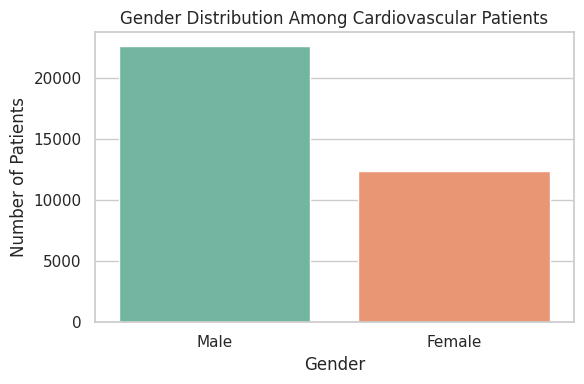

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and contains 'cardio' and 'gender' columns

# Filter for cardiovascular patients
cardio_patients = df[df['cardio'] == 1]

# Map gender if it's numeric (1 = Male, 2 = Female)
gender_labels = {1: 'Male', 2: 'Female'}
cardio_patients['gender'] = cardio_patients['gender'].map(gender_labels)

# Count gender distribution
gender_counts = cardio_patients['gender'].value_counts()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title('Gender Distribution Among Cardiovascular Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-1216227011.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cholesterol_labels, y=cholesterol_counts.values, palette="coolwarm")


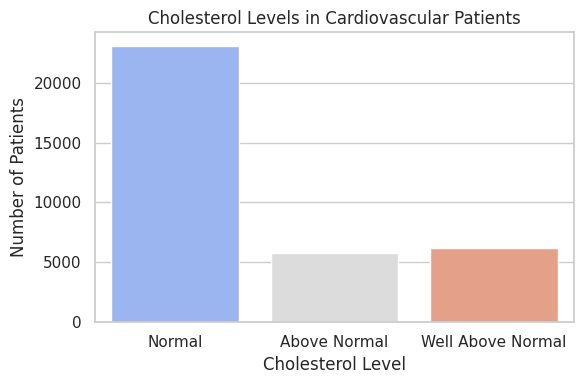

/tmp/ipython-input-16-1216227011.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=glucose_labels, y=glucose_counts.values, palette="YlOrRd")


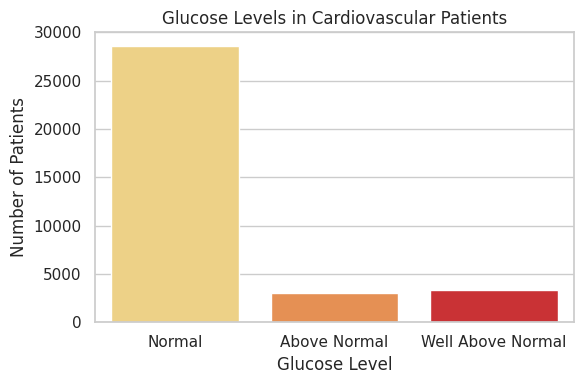

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cardiovascular patients
cardio_patients = df[df['cardio'] == 1]

# Define label mapping
labels = {1: "Normal", 2: "Above Normal", 3: "Well Above Normal"}

# Cholesterol counts and label mapping
cholesterol_counts = cardio_patients['cholesterol'].value_counts().sort_index()
cholesterol_labels = [labels[i] for i in cholesterol_counts.index]

# Glucose counts and label mapping
glucose_counts = cardio_patients['gluc'].value_counts().sort_index()
glucose_labels = [labels[i] for i in glucose_counts.index]

# Set up plot style
sns.set_style("whitegrid")

# Plot cholesterol levels
plt.figure(figsize=(6, 4))
sns.barplot(x=cholesterol_labels, y=cholesterol_counts.values, palette="coolwarm")
plt.title('Cholesterol Levels in Cardiovascular Patients')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Plot glucose levels
plt.figure(figsize=(6, 4))
sns.barplot(x=glucose_labels, y=glucose_counts.values, palette="YlOrRd")
plt.title('Glucose Levels in Cardiovascular Patients')
plt.xlabel('Glucose Level')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


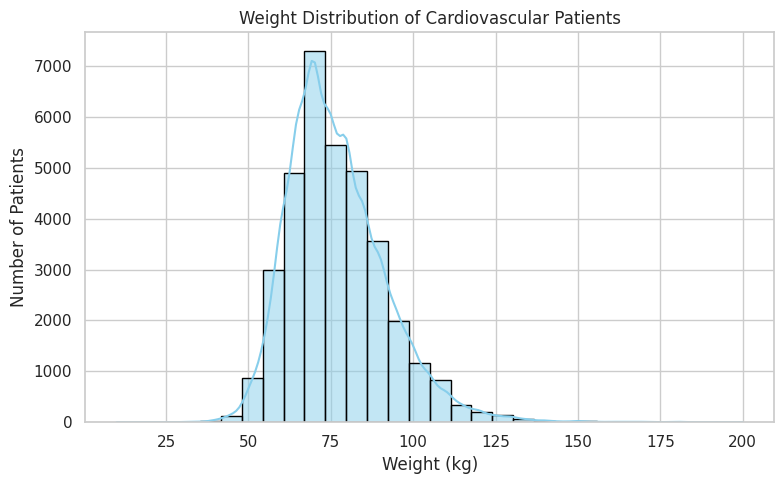

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cardiovascular patients
cardio_patients = df[df['cardio'] == 1]

# Set plot style
sns.set_style("whitegrid")

# Plot histogram and KDE of weight
plt.figure(figsize=(8, 5))
sns.histplot(cardio_patients['weight'], kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title('Weight Distribution of Cardiovascular Patients')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-2546846926.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(cardio_patients['cholesterol'], bins=3,kde = True ,palette='Set2', discrete=True)
/tmp/ipython-input-6-2546846926.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(cardio_patients['gluc'], bins=3, kde=True, palette='Set2', discrete=True)


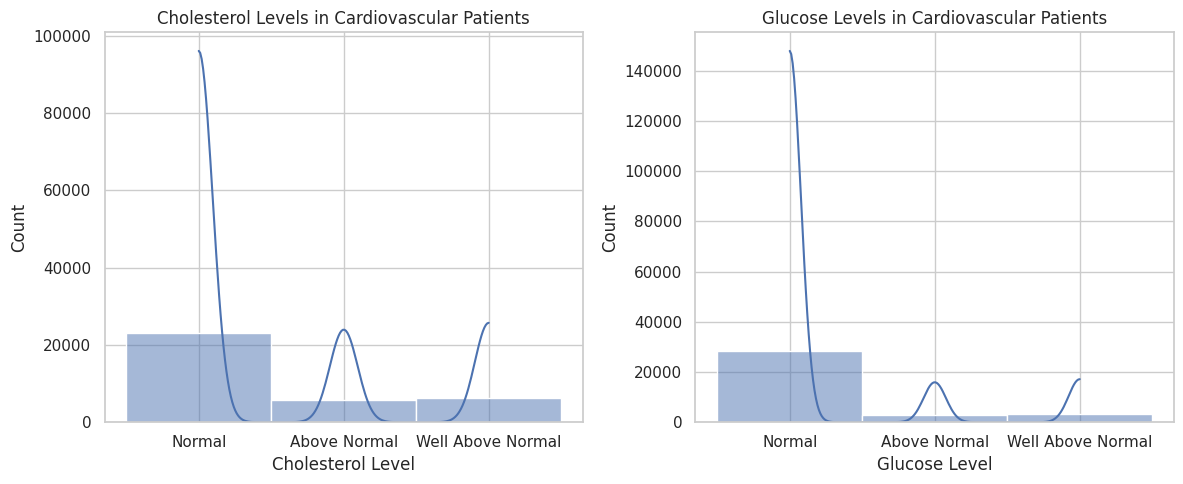

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cardiovascular patients
cardio_patients = df[df['cardio'] == 1]

# Set Seaborn style
sns.set(style="whitegrid")

# Plot cholesterol histogram with KDE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cardio_patients['cholesterol'], bins=3,kde = True ,palette='Set2', discrete=True)
plt.title('Cholesterol Levels in Cardiovascular Patients')
plt.xlabel('Cholesterol Level')
plt.xticks([1, 2, 3], ['Normal', 'Above Normal', 'Well Above Normal'])
plt.ylabel('Count')

# Plot glucose histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(cardio_patients['gluc'], bins=3, kde=True, palette='Set2', discrete=True)
plt.title('Glucose Levels in Cardiovascular Patients')
plt.xlabel('Glucose Level')
plt.xticks([1, 2, 3], ['Normal', 'Above Normal', 'Well Above Normal'])
plt.ylabel('Count')

plt.tight_layout()
plt.show()


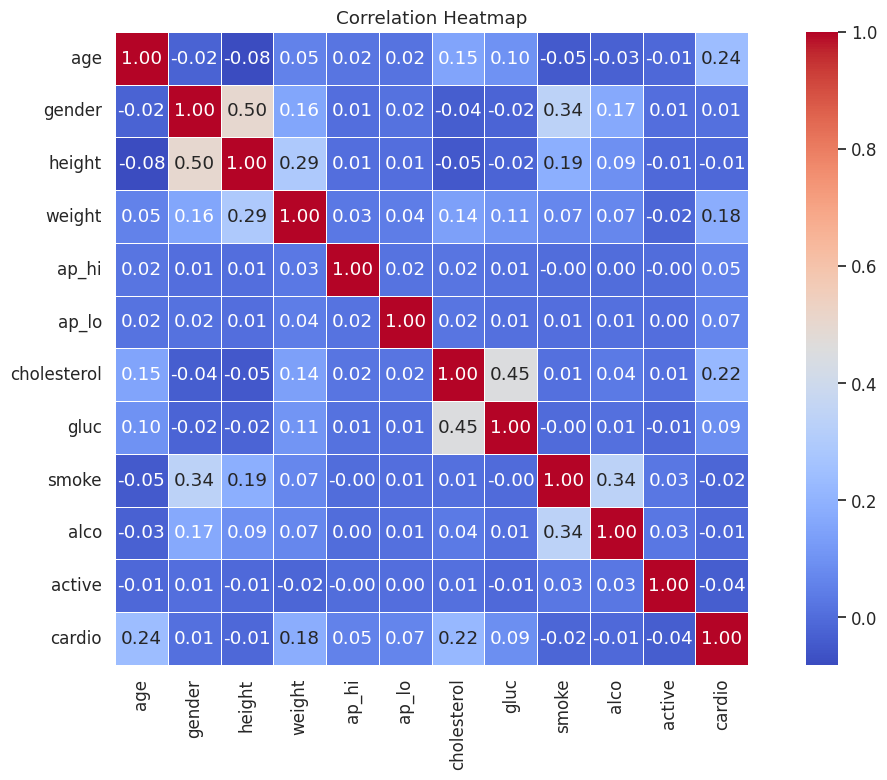

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: drop 'id' since it doesn't carry useful information for correlation
df_corr = df.drop(columns=['id'])

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Title
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
